# Housing Prices

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.svm import SVC

df = pd.read_csv('./data/housing_prices.csv')
print(df.shape[0], 'rows')
print(df.shape[1], 'columns')
df.head()

52964 rows
12 columns


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [2]:
for col in df.columns:
    print(col, '-', df[col].dtype, ';', len(df[col].unique()), 'unique vals')

Suburb - object ; 375 unique vals
Address - object ; 48396 unique vals
Rooms - int64 ; 13 unique vals
Type - object ; 3 unique vals
Price - float64 ; 3254 unique vals
Method - object ; 9 unique vals
SellerG - object ; 434 unique vals
Date - object ; 91 unique vals
Regionname - object ; 8 unique vals
Propertycount - int64 ; 364 unique vals
Distance - float64 ; 180 unique vals
CouncilArea - object ; 33 unique vals


In [3]:
# Remove rows without Price
df = df.dropna(subset=['Price'])

# Convert date to actual datetime
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].apply(lambda x: x.year)

# Get dummies for categorical columns
df = pd.get_dummies(df, columns=['Type', 'Method', 'Regionname', 'CouncilArea'])
df.head()

,Suburb,Address,Rooms,Price,SellerG,Date,Propertycount,Distance,Year,Type_h,...,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
0,Abbotsford,49 Lithgow St,3,1490000.0,Jellis,2017-01-04,4019,3.0,2017,1,...,0,0,0,0,0,0,0,0,1,0
1,Abbotsford,59A Turner St,3,1220000.0,Marshall,2017-01-04,4019,3.0,2017,1,...,0,0,0,0,0,0,0,0,1,0
2,Abbotsford,119B Yarra St,3,1420000.0,Nelson,2017-01-04,4019,3.0,2017,1,...,0,0,0,0,0,0,0,0,1,0
3,Aberfeldie,68 Vida St,3,1515000.0,Barry,2017-01-04,1543,7.5,2017,1,...,0,0,0,0,0,0,0,0,0,0
4,Airport West,92 Clydesdale Rd,2,670000.0,Nelson,2017-01-04,3464,10.4,2017,1,...,0,0,0,0,0,0,0,0,0,0


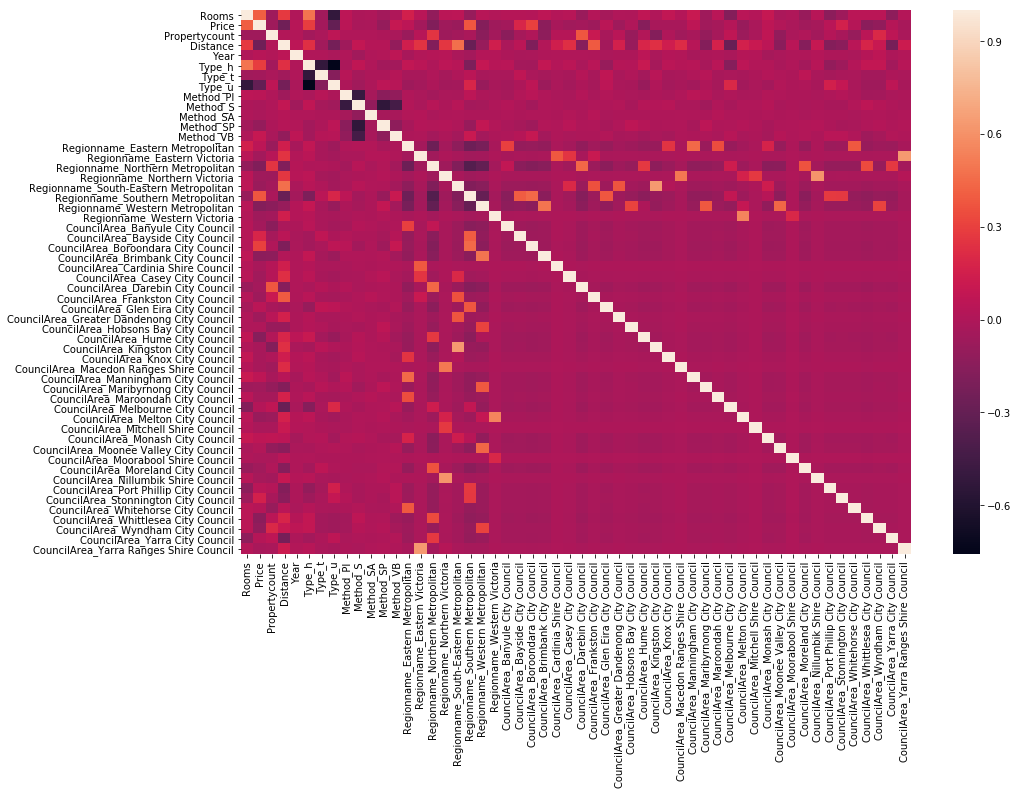

In [4]:
non_numeric_cols = ['Date', 'SellerG', 'Address', 'Suburb']

plt.figure(figsize=(15,10))
sns.heatmap(df.drop(non_numeric_cols, 1).corr())
plt.show()

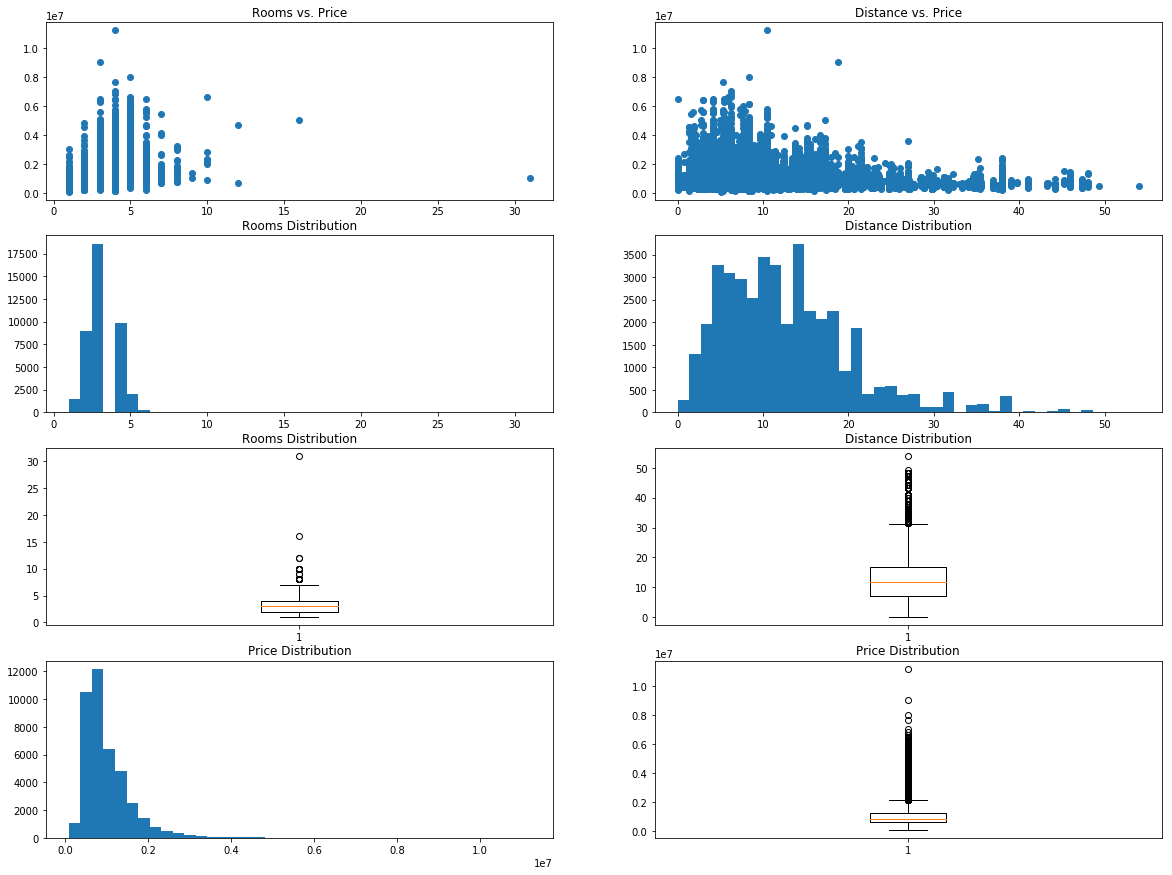

In [5]:
def show_plots(df):
    plt.figure(figsize=(20,15))

    plt.subplot(4, 2, 1)
    plt.scatter(df['Rooms'], df['Price'])
    plt.title('Rooms vs. Price')

    plt.subplot(4, 2, 2)
    plt.scatter(df['Distance'], df['Price'])
    plt.title('Distance vs. Price')

    plt.subplot(4, 2, 3)
    plt.hist(df['Rooms'], bins=40)
    plt.title('Rooms Distribution')

    plt.subplot(4, 2, 4)
    plt.hist(df['Distance'], bins=40)
    plt.title('Distance Distribution')

    plt.subplot(4, 2, 5)
    plt.boxplot(df['Rooms'])
    plt.title('Rooms Distribution')

    plt.subplot(4, 2, 6)
    plt.boxplot(df['Distance'])
    plt.title('Distance Distribution')

    plt.subplot(4, 2, 7)
    plt.hist(df['Price'], bins=40)
    plt.title('Price Distribution')

    plt.subplot(4, 2, 8)
    plt.boxplot(df['Price'])
    plt.title('Price Distribution')

    plt.show()
    
show_plots(df)

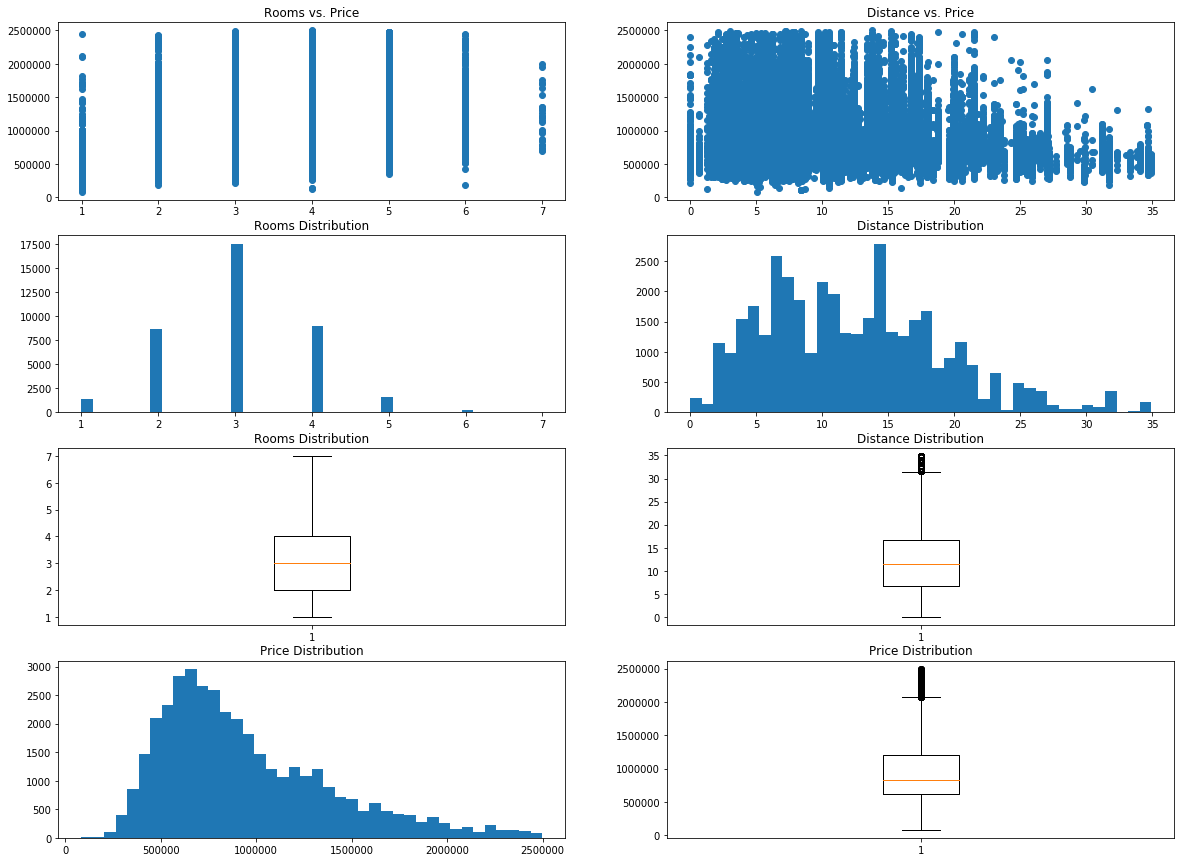

In [6]:
# Get rid of outliers
df = df[df['Rooms'] < 8]
df = df[df['Distance'] < 35]
df = df[df['Propertycount'] < 18000]
df = df[df['Price'] < 2500000]
show_plots(df)

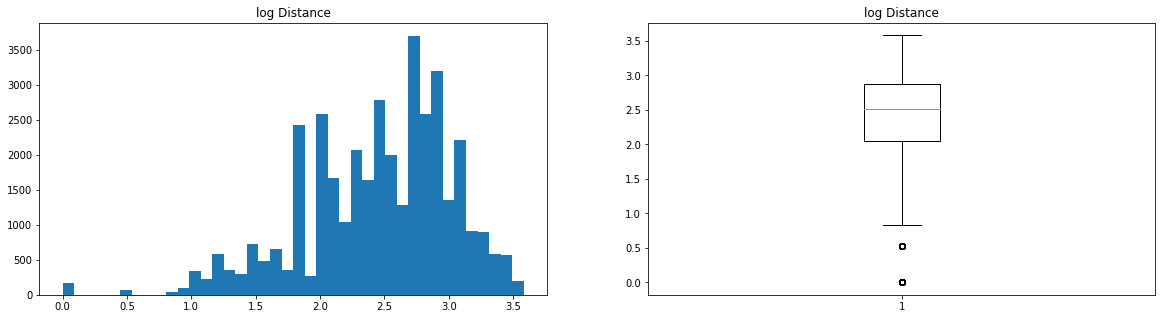

In [7]:
# Feature engineering
df['log Distance'] = np.log(df['Distance'] + 1)

plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
plt.hist(df['log Distance'], bins=40)
plt.title('log Distance')

plt.subplot(1, 2, 2)
plt.boxplot(df['log Distance'])
plt.title('log Distance')

plt.show()

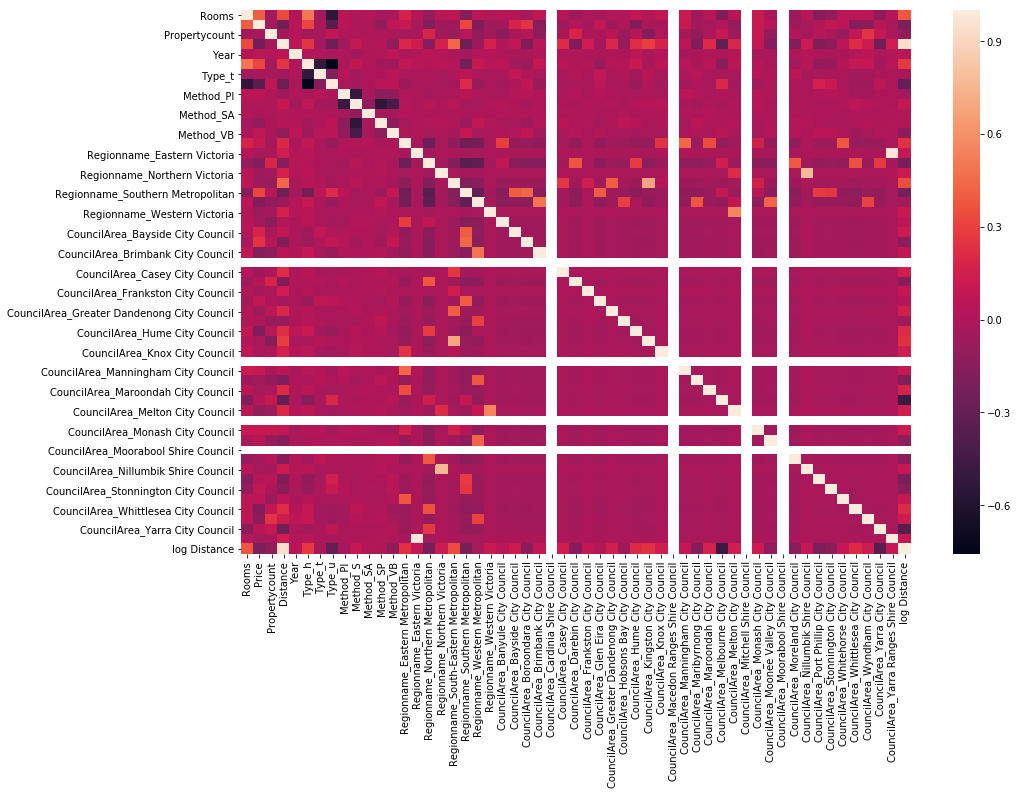

In [8]:
plt.figure(figsize=(15,10))
sns.heatmap(df.drop(non_numeric_cols, 1).corr())
plt.show()

In [9]:
Y = df['Price']
X = np.array(df.drop(labels=['Price'] + non_numeric_cols, axis=1))
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=0)

def fit_and_score(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    if hasattr(model, 'coef_') and hasattr(model, 'intercept_'):
        print('Coef:', model.coef_)
        print('Intercept:', model.intercept_, '\n')
    
    print('Training:', model.score(X_train, y_train))
    print('Test:', model.score(X_test, y_test))

In [10]:
fit_and_score(linear_model.LinearRegression(), X_train, y_train, X_test, y_test)

Coef: [ 1.87161860e+05 -4.03229201e-01 -1.28450406e+04  6.20675792e+04
  2.12590085e+05  4.71332325e+03 -2.17303408e+05 -7.79165083e+03
  3.81741271e+04 -2.68556195e+04  1.21500366e+04 -1.56768934e+04
  1.21509590e+05 -1.81187311e+04 -9.65160568e+04 -8.66243307e+02
 -4.03645611e+04  2.08478063e+04 -4.65964694e+04  6.01046658e+04
 -1.22270881e+05  4.24873735e+05  3.95949977e+05 -2.92862138e+05
  8.73114914e-11 -5.85481865e+04  6.44835645e+04 -1.75405611e+04
  2.34138477e+05 -6.84860722e+03 -2.50495452e+04 -2.51302933e+05
  2.39175549e+05 -1.55144545e+05 -4.36557457e-11  5.41710467e+04
 -1.55964807e+05 -8.38964031e+04  7.28686036e+04 -3.22772478e+05
  0.00000000e+00  1.55997661e+05  5.26724197e+04 -4.36557457e-11
 -2.63602718e+04 -1.95811308e+05  1.55771133e+05  3.14869116e+05
  4.17380889e+04 -1.90045498e+05 -3.70792810e+05  1.18346759e+05
 -4.98451573e+04 -1.57589373e+05]
Intercept: -124404452.77152224 

Training: 0.6532945038925981
Test: 0.6520657798469729


In [11]:
fit_and_score(linear_model.Ridge(), X_train, y_train, X_test, y_test)

Coef: [ 1.87151907e+05 -3.91747296e-01 -1.27942883e+04  6.20340658e+04
  2.12505854e+05  4.74374029e+03 -2.17249594e+05 -7.77066483e+03
  3.81301358e+04 -2.68527731e+04  1.21339902e+04 -1.56406881e+04
  1.25037424e+05 -2.08730100e+04 -9.41427779e+04 -6.50899308e+03
 -3.49858435e+04  2.68901136e+04 -4.95226583e+04  5.41057455e+04
 -1.23079127e+05  4.20651889e+05  3.91615807e+05 -2.87517740e+05
  0.00000000e+00 -6.12619394e+04  6.38763288e+04 -2.02770931e+04
  2.29977624e+05 -9.95579659e+03 -2.01161420e+04 -2.50222133e+05
  2.35790744e+05 -1.56223145e+05  0.00000000e+00  5.28124257e+04
 -1.51093032e+05 -8.49815104e+04  6.98140838e+04 -3.15128613e+05
  0.00000000e+00  1.53268514e+05  5.74551154e+04  0.00000000e+00
 -2.67446056e+04 -1.87662127e+05  1.50991858e+05  3.09928974e+05
  4.03838921e+04 -1.89962188e+05 -3.65018298e+05  1.16967881e+05
 -4.42916486e+04 -1.58661856e+05]
Intercept: -124336846.84279421 

Training: 0.6532909832624287
Test: 0.6520993385849734


In [12]:
fit_and_score(linear_model.Lasso(alpha=100), X_train, y_train, X_test, y_test)

Coef: [ 1.87117028e+05 -2.50875258e-01 -1.34172656e+04  6.14808202e+04
  2.06669878e+05  0.00000000e+00 -2.21320326e+05  0.00000000e+00
  4.51758681e+04 -5.97756332e+03  1.82704922e+04 -6.73566471e+03
  1.55332885e+05 -0.00000000e+00 -6.48386803e+04 -0.00000000e+00
  0.00000000e+00  7.07907844e+04 -4.03287014e+04  2.54686109e+04
 -1.18005921e+05  4.10071936e+05  3.74926846e+05 -2.60692072e+05
  0.00000000e+00 -2.91500445e+04  5.99574202e+04 -0.00000000e+00
  2.16056352e+05 -0.00000000e+00  0.00000000e+00 -2.34727515e+05
  2.39290698e+05 -1.40793411e+05  0.00000000e+00  5.48271811e+04
 -1.30954790e+05 -7.00251736e+04  5.21048120e+04 -2.62064134e+05
  0.00000000e+00  1.50702987e+05  7.47589838e+04  0.00000000e+00
 -2.56826471e+04 -1.36103499e+05  1.27668823e+05  2.88070020e+05
  4.21912397e+04 -1.77657484e+05 -3.33219124e+05  1.05762041e+05
 -0.00000000e+00 -1.62523231e+05]
Intercept: -123239313.21468304 

Training: 0.6530613993315795
Test: 0.6522218745401442


In [ ]:
# add C (linear bc regression)
fit_and_score(SVC(kernel = 'linear'), X_train, y_train, X_test, y_test)

In [ ]:
# Make 500 iterations, use 2-deep trees, set loss function
params = {'n_estimators': 500, 'max_depth': 2, 'loss': 'deviance'}

fit_and_score(ensemble.GradientBoostingRegressor(**params), X_train, y_train, X_test, y_test)

In [ ]:
# add hyperparameters to avoid overfitting (big diff between train and test)
fit_and_score(ensemble.RandomForestRegressor(), X_train, y_train, X_test, y_test)